# Import Lib

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Đọc tệp Excel
file_path = r"C:\Users\ADMIN\Downloads\data_got.xlsx"
xl = pd.ExcelFile(file_path)

In [4]:
# Lấy tên các sheet và đọc dữ liệu từ các sheet (trừ sheet đầu tiên)
sheet_names = xl.sheet_names
sheet_names_except_first = sheet_names[1:]
dataframes = {sheet: xl.parse(sheet) for sheet in sheet_names_except_first}

In [5]:
# Khám phá cấu trúc của từng bảng dữ liệu
for sheet_name, df in dataframes.items():
    print(f"Data in {sheet_name}:")
    print("First 5 rows:\n", df.head())
    print("Data Types:\n", df.dtypes)
    print("Missing Values:\n", df.isnull().sum())
    print("\n")

Data in customer:
First 5 rows:
    customerid    DOB gender                 address       Website  \
0  0000000014  36268     Nữ  hoa khe quan thanh khe   KH0104|0345   
1  0000000034  35901    Nam                man thai   KH0104|0333   
2  0000000051  34319    Nam       que son quang nam   KH0104|0255   
3  0000000081  36472    Nam            truong chinh   KH0104|0293   
4  0000000098  34608    Nam                  cẩm lệ  KH0104|40580   

           job        industry  
0      student        computer  
1      student  health service  
2  blue collar       economics  
3      student       economics  
4  blue collar  health service  
Data Types:
 customerid    object
DOB            int64
gender        object
address       object
Website       object
job           object
industry      object
dtype: object
Missing Values:
 customerid       0
DOB              0
gender           0
address          1
Website        536
job              0
industry      1122
dtype: int64


Data in ticket:

# Làm sạch dữ liệu

In [6]:
# Xử lý giá trị bị thiếu trong bảng 'customer'
dataframes['customer']['address'].fillna('Unknown', inplace=True)
dataframes['customer']['industry'].fillna('Not Specified', inplace=True)
dataframes['customer']['Website'].fillna('No Website', inplace=True)

# Xử lý giá trị bị thiếu trong bảng 'film'
for column in ['director', 'cast', 'country', 'rating']:
    dataframes['film'][column].fillna('Unknown', inplace=True)

In [7]:
# Hiển thị dữ liệu sau khi làm sạch
cleaned_customer_df = dataframes['customer'].head()
cleaned_ticket_df = dataframes['ticket'].head()
cleaned_film_df = dataframes['film'].head()

print("Cleaned Data - Customer:\n", cleaned_customer_df)

Cleaned Data - Customer:
    customerid    DOB gender                 address       Website  \
0  0000000014  36268     Nữ  hoa khe quan thanh khe   KH0104|0345   
1  0000000034  35901    Nam                man thai   KH0104|0333   
2  0000000051  34319    Nam       que son quang nam   KH0104|0255   
3  0000000081  36472    Nam            truong chinh   KH0104|0293   
4  0000000098  34608    Nam                  cẩm lệ  KH0104|40580   

           job        industry  
0      student        computer  
1      student  health service  
2  blue collar       economics  
3      student       economics  
4  blue collar  health service  


In [8]:
print("Cleaned Data - Ticket:\n", cleaned_ticket_df)

Cleaned Data - Ticket:
             orderid cashier            saledate    total  customerid  \
0  10006052019B0225  emp002 2019-05-06 16:40:43  90000.0  0000000014   
1  10006052019B0225  emp002 2019-05-06 16:40:43  90000.0  0000000014   
2  10022052019B0167  emp011 2019-05-22 20:30:28  90000.0  0000000034   
3  10022052019B0167  emp011 2019-05-22 20:30:28  90000.0  0000000034   
4  10130052019B0141  emp005 2019-05-30 19:28:44  90000.0  0000000034   

   ticketcode       date      time slot  room  \
0    20074925 2019-05-06  18:15:00  G04     3   
1    20074924 2019-05-06  18:15:00  G03     3   
2    20097042 2019-05-22  20:45:00  E04     2   
3    20097041 2019-05-22  20:45:00  E03     2   
4    20106761 2019-05-30  19:30:00  F04     1   

                                      film slot type ticket type  \
0                        AVENGERS: HỒI KẾT       ĐƠN  Thành viên   
1                        AVENGERS: HỒI KẾT       ĐƠN  Thành viên   
2  JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18)  

In [9]:
print("Cleaned Data - Film:\n", cleaned_film_df)

Cleaned Data - Film:
   show_id                           title            director  \
0     s27             X-Men: Dark Phoenix       Simon Kinberg   
1    s165       The Kid Who Would Be King         Joe Cornish   
2    s194  Disney My Music Story: Perfume  Kentaro Takayanagi   
3    s222  Disney My Music Story: Yoshiki  Kentaro Takayanagi   
4    s241           Great Shark Chow Down       Mark Woodward   

                                                cast  \
0  James McAvoy, Michael Fassbender, Jennifer Law...   
1  Louis Ashbourne Serkis, Tom Taylor, Rebecca Fe...   
2                        a-chan , KASHIYUKA , NOCCHi   
3                                            YOSHIKI   
4                                       Dan Nachtrab   

                         country  release_year   rating duration  \
0          United States, Canada          2019    PG-13  115 min   
1  United Kingdom, United States          2019       PG  121 min   
2                        Unknown          2019

## Check outlier

In [10]:
def check_and_visualize_outliers(df, column):
    # Sử dụng mô tả thống kê
    print(df[column].describe())
    
    # Kiểm tra outliers bằng biểu đồ boxplot
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [23]:
df_customer = dataframes['customer'] 
df_ticket = dataframes['ticket']
df_film = dataframes['film']

In [19]:
df_customer

,customerid,DOB,gender,address,Website,job,industry
0,0000000014,36268,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer
1,0000000034,35901,Nam,man thai,KH0104|0333,student,health service
2,0000000051,34319,Nam,que son quang nam,KH0104|0255,blue collar,economics
3,0000000081,36472,Nam,truong chinh,KH0104|0293,student,economics
4,0000000098,34608,Nam,cẩm lệ,KH0104|40580,blue collar,health service
...,...,...,...,...,...,...,...
4474,KH9855766,34885,Nữ,"A, THUAN PHUOC,HAI CHAU, DA NANG",No Website,specialist,finance
4475,KH9958204,36892,Nữ,"Phước Mỹ, ĐN",No Website,teenager,Not Specified
4476,WEBS00000043900,32311,Nữ,nguyen gian thanh,KHWEBS|00006890,specialist,construction
4477,WEBS00000044909,35316,Nữ,ngũ hành sơn,KHWEBS|00007899,blue collar,finance


In [22]:
df_ticket

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,film,slot type,ticket type,ticket price,popcorn
0,10006052019B0225,emp002,2019-05-06 16:40:43,90000.0,0000000014,20074925,2019-05-06,18:15:00,G04,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không
1,10006052019B0225,emp002,2019-05-06 16:40:43,90000.0,0000000014,20074924,2019-05-06,18:15:00,G03,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không
2,10022052019B0167,emp011,2019-05-22 20:30:28,90000.0,0000000034,20097042,2019-05-22,20:45:00,E04,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không
3,10022052019B0167,emp011,2019-05-22 20:30:28,90000.0,0000000034,20097041,2019-05-22,20:45:00,E03,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không
4,10130052019B0141,emp005,2019-05-30 19:28:44,90000.0,0000000034,20106761,2019-05-30,19:30:00,F04,1,NGÔI ĐỀN KỲ QUÁI (C18),ĐƠN,Thành viên,45000,Không
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35469,10130052019B0192,emp005,2019-05-30 21:49:46,180000.0,WEBS00000044909,20107072,2019-05-30,21:35:00,B10,4,CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ (C13),ĐƠN,Thành viên,45000,Không
35470,10130052019B0192,emp005,2019-05-30 21:49:46,180000.0,WEBS00000044909,20107071,2019-05-30,21:35:00,B09,4,CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ (C13),ĐƠN,Thành viên,45000,Không
35471,10130052019B0192,emp005,2019-05-30 21:49:46,180000.0,WEBS00000044909,20107069,2019-05-30,21:35:00,B07,4,CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ (C13),ĐƠN,Thành viên,45000,Không
35472,12508052019B0036,emp007,2019-05-08 19:26:47,90000.0,WEBS00000046015,20077797,2019-05-08,19:15:00,C14,4,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không


count    3.537800e+04
mean     1.627623e+05
std      1.503604e+05
min      0.000000e+00
25%      9.000000e+04
50%      9.000000e+04
75%      1.800000e+05
max      1.935000e+06
Name: total, dtype: float64


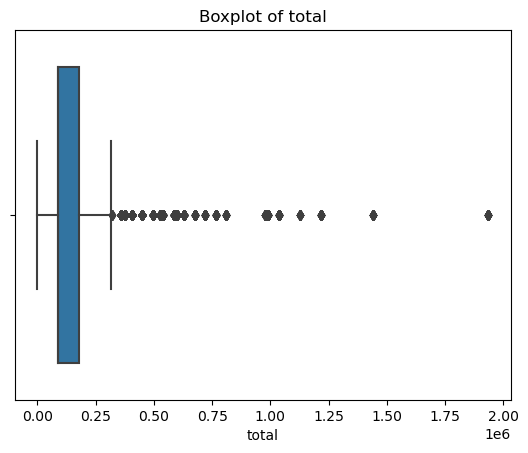

In [21]:
check_and_visualize_outliers(df_ticket, 'total')

Không xử lý outlier ở cột total, vì có thể xuất hiện những lần mua vé số lượng lớn dẫn đến total cao

CTA
- Thống kê mô tả dữ liệu
- Data Transformation 